In [403]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [404]:
X = np.loadtxt("DataTrafficSigns.csv", delimiter=',')/255.0
yBinary = np.loadtxt("yBinary.csv", delimiter=',')
yLabels = np.loadtxt("yLabels.csv", delimiter=',')

testSet = np.loadtxt("DataTrafficSignsTest.csv", delimiter=",")/255.0
testSetLabels = np.loadtxt("yLabelsTest.csv", delimiter=",")
testSetLabelsBinary = np.loadtxt("yLabelsTestBinary.csv", delimiter=",")

cvSet = np.array_split(testSet,2)[0]
testSet = np.array_split(testSet,2)[1]

cvSetLabelsBinary = np.array_split(testSetLabelsBinary,2)[0]
testSetLabelsBinary = np.array_split(testSetLabelsBinary,2)[1]

cvSetLabels = np.array_split(testSetLabels,2)[0]
testSetLabels = np.array_split(testSetLabels,2)[1]

%store X
%store yBinary
%store yLabels

%store testSet
%store testSetLabels
%store testSetLabelsBinary

%store cvSet
%store cvSetLabelsBinary
%store cvSetLabels

Stored 'X' (ndarray)
Stored 'yBinary' (ndarray)
Stored 'yLabels' (ndarray)
Stored 'testSet' (ndarray)
Stored 'testSetLabels' (ndarray)
Stored 'testSetLabelsBinary' (ndarray)
Stored 'cvSet' (ndarray)
Stored 'cvSetLabelsBinary' (ndarray)
Stored 'cvSetLabels' (ndarray)
[[0.30196078 0.29803922 0.33333333 ... 0.4        0.38823529 0.36862745]
 [0.28235294 0.30588235 0.29803922 ... 0.29019608 0.40392157 0.4       ]
 [0.28235294 0.30980392 0.30196078 ... 0.27843137 0.31764706 0.37647059]
 ...
 [0.04313725 0.05098039 0.04705882 ... 0.03921569 0.04705882 0.04705882]
 [0.05098039 0.05490196 0.04705882 ... 0.05490196 0.03921569 0.03529412]
 [0.04313725 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]]


In [405]:
%store -r X
%store -r yLabels
%store -r yBinary

%store -r testSet
%store -r testSetLabels
%store -r testSetLabelsBinary

%store -r cvSet
%store -r cvSetLabelsBinary
%store -r cvSetLabels
print("Test set should be (6315, 900): "+ str(testSet.shape))
print("Test set binary should be (6315,43): "+ str(testSetLabelsBinary.shape))
print("Test set labels should be (6315,): "+ str(testSetLabels.shape))

print("CV set should be (6315, 900): "+ str(cvSet.shape))
print("CV set binary should be (6315,43): "+ str(cvSetLabelsBinary.shape))
print("CV set labels should be (6315,): "+ str(cvSetLabels.shape))

print("Data should be (39209,900): " + str(X.shape))
print("yBinary should be (39209,43): " + str(yBinary.shape))
print("yLabels should be (39209,): " + str(yLabels.shape))

Test set should be (6315, 900): (6315, 900)
Test set binary should be (6315,43): (6315, 43)
Test set labels should be (6315,): (6315,)
CV set should be (6315, 900): (6315, 900)
CV set binary should be (6315,43): (6315, 43)
CV set labels should be (6315,): (6315,)
Data should be (39209,900): (39209, 900)
yBinary should be (39209,43): (39209, 43)
yLabels should be (39209,): (39209,)


In [440]:
model = Sequential()
model.add(Dense(900, input_dim=900, activation='relu'))
model.add(Dense(500, activation='relu', kernel_regularizer=keras.regularizers.l1(l1=0.09)))
model.add(Dense(43, activation='softmax'))

In [441]:
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [442]:
history = model.fit(
  X, # training data
  yBinary, # training targets
  validation_data=(cvSet, cvSetLabelsBinary),
  epochs=150,
  batch_size=32,
)

Epoch 1/150
1226/1226 [==============================] - 12s 9ms/step - loss: 33.6567 - accuracy: 0.0779 - val_loss: 8.2787 - val_accuracy: 0.0879
Epoch 2/150
1226/1226 [==============================] - 11s 9ms/step - loss: 8.1746 - accuracy: 0.1016 - val_loss: 7.9832 - val_accuracy: 0.1184
Epoch 3/150
1226/1226 [==============================] - 11s 9ms/step - loss: 7.7750 - accuracy: 0.1619 - val_loss: 7.7035 - val_accuracy: 0.1789
Epoch 4/150
1226/1226 [==============================] - 11s 9ms/step - loss: 7.4778 - accuracy: 0.2370 - val_loss: 7.4436 - val_accuracy: 0.2725
Epoch 5/150
1226/1226 [==============================] - 11s 9ms/step - loss: 7.2604 - accuracy: 0.2915 - val_loss: 7.3158 - val_accuracy: 0.3063
Epoch 6/150
1226/1226 [==============================] - 11s 9ms/step - loss: 7.1341 - accuracy: 0.3347 - val_loss: 7.2340 - val_accuracy: 0.3571
Epoch 7/150
1226/1226 [==============================] - 11s 9ms/step - loss: 6.9846 - accuracy: 0.3935 - val_loss: 7.0803 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


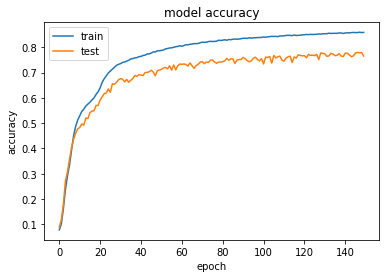

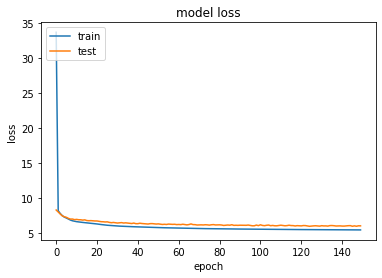

In [443]:
# summarize history for accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [444]:
model.evaluate(x=testSet, y=testSetLabelsBinary)

198/198 [==============================] - 1s 4ms/step - loss: 6.0100 - accuracy: 0.7743


[6.00998592376709, 0.7743467688560486]